# Titanic: Machine Learning from Disaster

**In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**

Inspired by [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions).

## Workflow
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.**


## 1. Question or problem definition 

**Given from Kaggle:** 
Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

**Info about the case:**  

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


### Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying:** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating:** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting:** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting:** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating:** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting:** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

## 2. Acquire training and testing data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Acquire data

In [2]:
df_train = pd.read_csv('titanic/train.csv')  
df_test = pd.read_csv('titanic/test.csv')
combine = [df_train, df_test]

### Column description:
**Survival** =	Survival  
**Pclass**   =	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
**Sex**      =	Sex 	
**Age**      =	Age in years 	
**SibSp**    =	# of siblings / spouses aboard the Titanic 	
**Parch**    =	# of parents / children aboard the Titanic 	
**Ticket**   = 	Ticket number 	
**Fare**     =	Passenger fare 	
**Cabin**    =	Cabin number 	
**Embarked** =	Port of Embarkation 	(C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_sex
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male_0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female_1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female_0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male_1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male_0


### Analyze by describing data

**What features are available?**

In [4]:
list(df_train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### What features are categorical?
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.  

**Categorical:** Survived, Sex, Embarked  
**Ordinal:** Pclass

### What features are numerical?  
Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.  

**Continuous:** Age, Fare  
**Discrete:** SibSp, Parch

### Which features have mixed data types?
Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

* Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.


### Which features may contain errors or typos?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.  
* Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

### Which features contain blank, null or empty values?
These will require correcting.

* Cabin & Age & Embarked features contain a number of null values in that order for the training dataset.
* Cabin & Age are incomplete in case of test dataset

### What are the data types for various features?
Helping us during converting goal.  
* Seven features are integer or floats. Six in case of test dataset
* Six features are strings (object). Five for test dataset.

In [19]:
df_train.info()
print('-'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Survived_sex    891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch        

### What is the distribution of numerical feature values across the samples?
This helps determine how representative the training dataset is of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.


In [20]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Plots

## Survival rates

In [6]:
num_passengers = df_train.shape[0]

In [7]:
survivors = df_train['Survived'].sum()

In [8]:
casualties = num_passengers - survivors

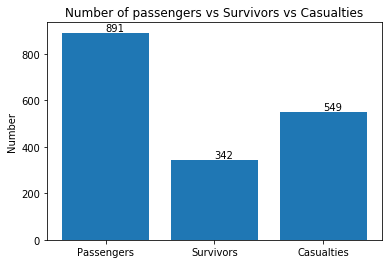

In [9]:
objects = ('Passengers', 'Survivors', 'Casualties')
y_pos = np.arange(len(objects))
performance = [num_passengers, survivors, casualties]
passengers = dict()
passengers = {'Passengers' : num_passengers,
              'Survivors' : survivors,
              'Casualties' : casualties}

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of passengers vs Survivors vs Casualties')
i = 0
for passenger in passengers:
    plt.text(i, passengers[passenger] + 8, passengers[passenger])
    i += 1
    
plt.show()

## Casualties women vs men

In [10]:
df_train['Survived_sex'] = np.nan # Add empty column
df_train.head()

# Label each row for gender and whether he/she survived or not
df_train['Survived_sex'] = df_train.apply(lambda x: x['Sex'] + '_' + str(x['Survived']) , axis=1)

In [11]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1


In [12]:
casualties_dict = {   'survived_female' : df_train.query("Survived_sex == 'female_1'").shape[0],
                        'diseased_female' : df_train.query("Survived_sex == 'female_0'").shape[0],
                        'survived_male'   : df_train.query("Survived_sex == 'male_1'").shape[0],
                        'diseased_male'   : df_train.query("Survived_sex == 'male_0'").shape[0]
                     }
casualties_dict

{'survived_female': 233,
 'diseased_female': 81,
 'survived_male': 109,
 'diseased_male': 468}

In [13]:
df_casualties_gender = pd.DataFrame({'gender': ['male', 'female'],
                                    'survived': [casualties_dict['survived_male'], casualties_dict['survived_female']],
                                    'diseased': [casualties_dict['diseased_male'], casualties_dict['diseased_female']],
                                     'sum' : [casualties_dict['survived_male']+casualties_dict['diseased_male'], casualties_dict['survived_female']+casualties_dict['diseased_female']],
                                    })

In [14]:
df_casualties_gender.head()

,gender,survived,diseased,sum
0,male,109,468,577
1,female,233,81,314


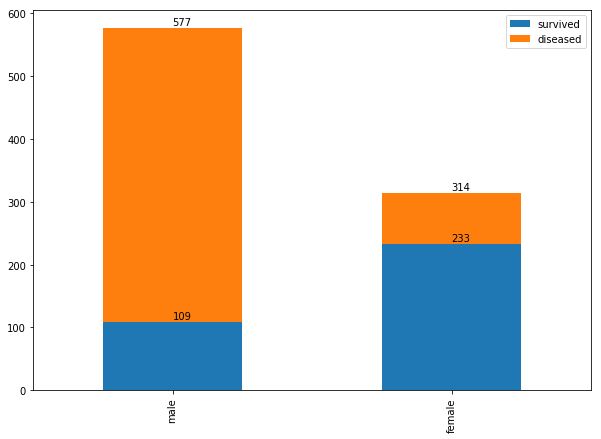

In [15]:
ax = df_casualties_gender[['survived', 'diseased']].plot.bar(stacked=True, figsize=(10,7))
ax.set_xticklabels(['male', 'female']);
for i in range(0,2):
    plt.text(i, df_casualties_gender['sum'].iloc[i]+5, df_casualties_gender['sum'].iloc[i])
    plt.text(i, df_casualties_gender['survived'].iloc[i]+5, df_casualties_gender['survived'].iloc[i])


# Regression analysis